In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


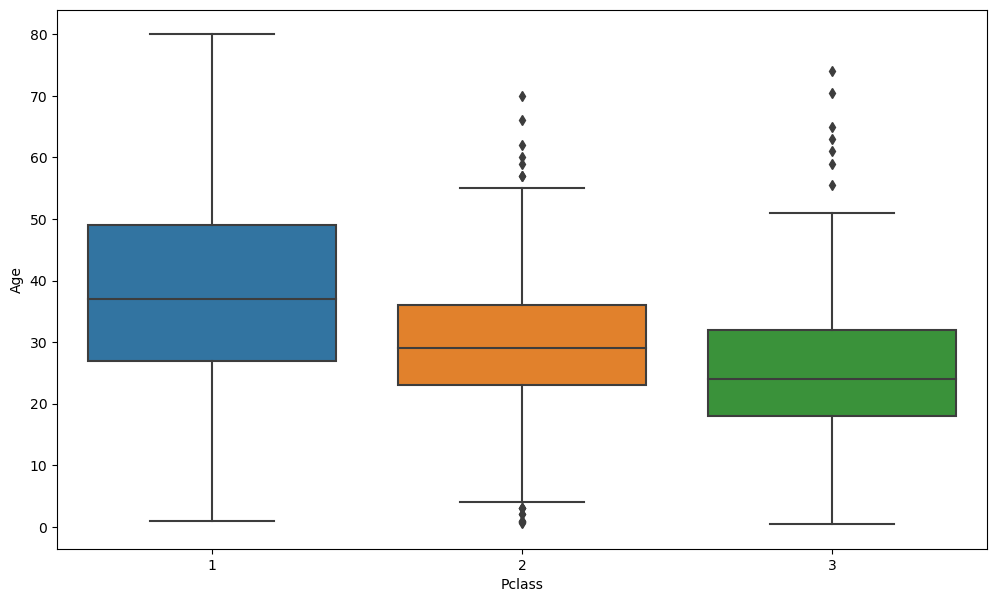

In [2]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Pclass", y="Age", data=train);

In [3]:
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isna(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [4]:
train["Age"] = train[["Age", "Pclass"]].apply(imputeAge, axis=1)

In [5]:
train.drop("Cabin", axis=1, inplace=True)

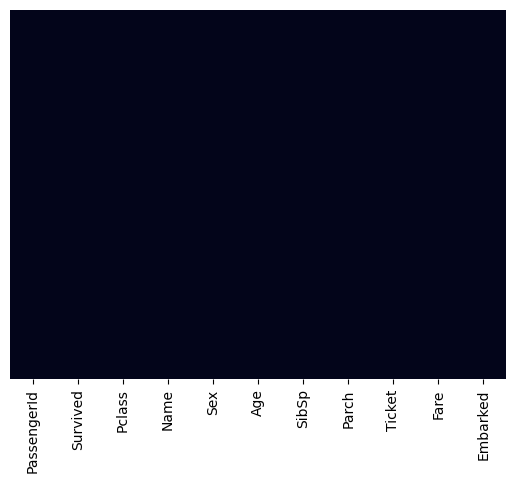

In [6]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False);

In [7]:
train.dropna(inplace=True)

In [8]:
sex = pd.get_dummies(train["Sex"], drop_first=True)
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [9]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [11]:
train = pd.concat([train, sex, embark], axis=1)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [13]:
from sklearn.model_selection import train_test_split
X = train.drop("Survived", axis=1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predictions = model.predict(X_test)

0.8239700374531835


In [16]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8239700374531835

In [19]:
import pickle
pickle.dump(model, open("baseline_survival_prediction_model.pkl", "wb"))

In [20]:
loaded_pickle_model = pickle.load(open("baseline_survival_prediction_model.pkl", "rb"))

In [21]:
pickle_model_preds = loaded_pickle_model.predict(X_test)
accuracy_score(y_test, pickle_model_preds)

0.8239700374531835